# Build model predict the salary base on year experience

In [1]:
# Import library
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam        
from pandas import read_csv

# Define data

In [2]:
def data_preparing(path):
    data = read_csv(path)
    year_ex = data["YearsExperience"].to_numpy()
    sal = data["Salary"].to_numpy()

    return year_ex, sal

In [3]:
data = data_preparing("E:\Data\Basic_DL\Salary_dataset.csv")
feature = data[0]
target = data[1]
print(feature.shape)
print(target.shape)

(30,)
(30,)


In [4]:
print(feature.ndim)

1


# Preprocessing

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

<Axes: >

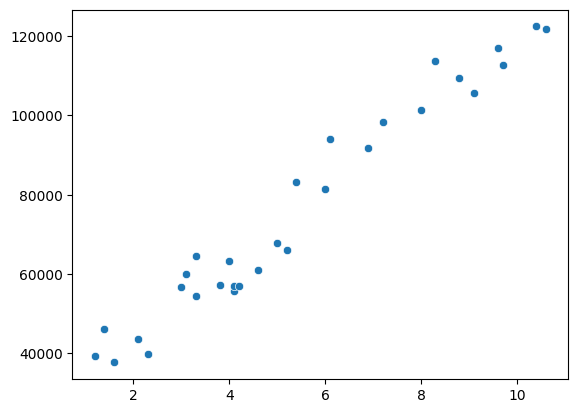

In [6]:
sn.scatterplot(x=feature, y=target)

In [7]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

feature = feature.reshape(-1, 1) 
target = target.reshape(-1,1)

feature = StandardScaler().fit_transform(feature)
target = StandardScaler().fit_transform(target)

<Axes: >

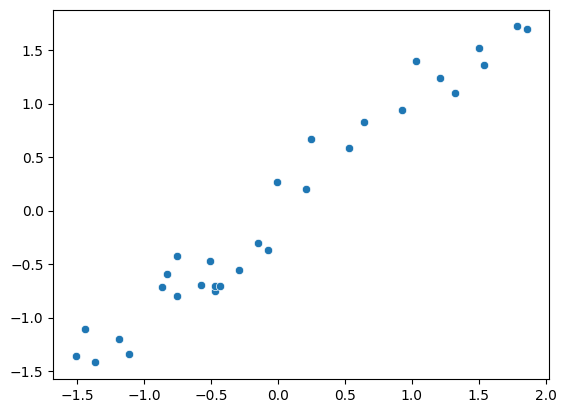

In [8]:
feature = feature.reshape(-1) 
target = target.reshape(-1) 

sn.scatterplot(x=feature, y=target)

# Build model 

In [9]:
def Linear_regression():
    # Define the network
    model = Sequential([
        Input(shape=(1,)),  # Dữ liệu đầu vào có 1 đặc trưng
        Dense(units=15),
        Dense(units=5),
        Dense(units=1),
        Dense(units=1)
    ])
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='mean_squared_error',  # Phù hợp cho hồi quy
              metrics=['mean_absolute_error'])

    
    return model

In [10]:
model = Linear_regression()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.previous_loss = None  # To store the loss from the previous epoch

    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when the change between the last loss and 
        the current loss is less than 0.01.

        Args:
            epoch (integer) - index of epoch
            logs (dict) - metric results from the training epoch
        '''
        current_loss = logs['loss']  # Current epoch loss
        
        if self.previous_loss is not None:
            # Check the change in loss
            loss_change = abs(current_loss - self.previous_loss)
            if loss_change < 0.001:
                print(
                    f"\nLoss change ({loss_change:.5f}) is less than 0.01, stopping training!"
                )
                self.model.stop_training = True

        # Update previous_loss for the next epoch
        self.previous_loss = current_loss


In [19]:
def train_model(input_data, target, model, epcs, callback):
    # Huấn luyện mô hình
    history = model.fit(
        input_data,
        target,
        epochs=epcs,
        batch_size=4,
        verbose=1,  # Hiển thị thông tin huấn luyện
        callbacks=callback
    )
    return model, history


In [20]:
res, his = train_model(feature, target, Linear_regression(), 30, callback=myCallback())

Epoch 1/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4402 - mean_absolute_error: 0.6030
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3367 - mean_absolute_error: 0.5287
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2493 - mean_absolute_error: 0.4503
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1671 - mean_absolute_error: 0.3694
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1198 - mean_absolute_error: 0.3108
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0803 - mean_absolute_error: 0.2477
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0571 - mean_absolute_error: 0.2049
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0477 - mean_absolute_error: 0.1808
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_absolute_error: 0.1746
Epoch 10/30
1/8 [==>.................

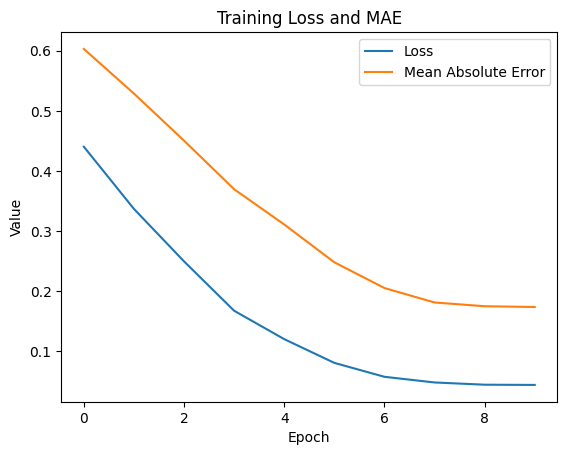

In [21]:
import matplotlib.pyplot as plt

# Plot the loss over epochs
plt.plot(his.history['loss'], label='Loss')
plt.plot(his.history['mean_absolute_error'], label='Mean Absolute Error')
plt.title('Training Loss and MAE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [15]:
loss = his.history['loss']
mae = his.history['mean_absolute_error']  # Assuming 'mean_absolute_error' is one of the tracked metrics

# Print the final values after training
print("Final loss:", loss[-1])
print("Final MAE:", mae[-1])

Final loss: 0.04358619078993797
Final MAE: 0.16978909075260162


In [16]:
# Assuming the model has been trained

# Retrieve weights and biases for each layer in the model
theta = {}

for i, layer in enumerate(model.layers):
    # Get weights (theta) and biases of the layer
    weights, biases = layer.get_weights()
    
    # Save the weights and biases to the dictionary for each layer
    theta[f'Layer_{i+1}_weights'] = weights
    theta[f'Layer_{i+1}_biases'] = biases

# Print the theta values (weights and biases) for all layers
for layer_name, param in theta.items():
    print(f"{layer_name}:\n{param}\n")


Layer_1_weights:
[[ 0.02594262 -0.49115324 -0.5859571  -0.06482923  0.53786534 -0.4653495
  -0.57953554  0.5488636   0.3172921   0.5183436  -0.29996702 -0.3864888
   0.23966879 -0.02633202  0.04060286]]

Layer_1_biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Layer_2_weights:
[[-0.47954193  0.4100104  -0.06422776  0.22862065 -0.04058075]
 [-0.00904214 -0.25490382 -0.07657152  0.09953243 -0.38406256]
 [-0.06478536 -0.15506124 -0.2650341   0.10714293  0.27631736]
 [-0.5212153  -0.3397696  -0.30474374 -0.39447585 -0.18633309]
 [ 0.0424245  -0.24991485 -0.12167805  0.4138456  -0.5358126 ]
 [ 0.17474008  0.2205283   0.308922    0.5107056   0.41438985]
 [-0.37223566  0.5169555  -0.35369617  0.18033904  0.10711026]
 [ 0.13466209  0.5071881   0.27446657  0.36181504 -0.29722124]
 [-0.22842282 -0.3158502   0.23413092  0.40689677  0.5158974 ]
 [-0.14391968  0.30097175  0.37443095 -0.50016624 -0.15902549]
 [-0.07755196 -0.38030607 -0.4635155  -0.16618246  0.35007226]
 [-0.09889895 -0.07210

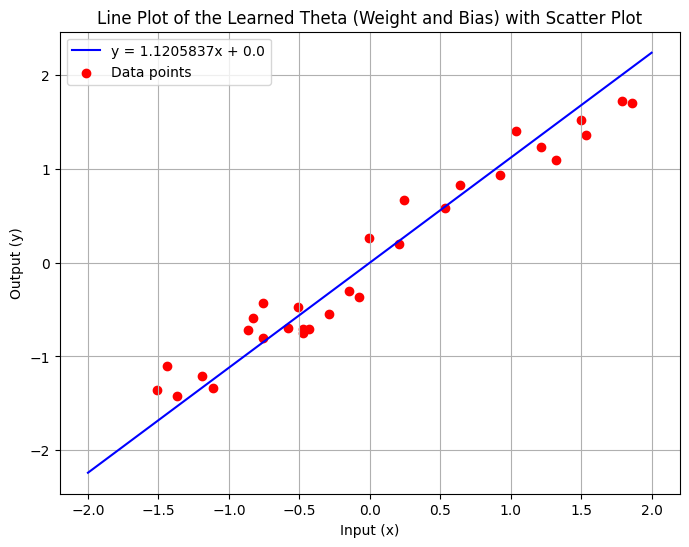

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Theta values from Layer_4
weight = 1.1205837  # Layer_4 weight
bias = 0.0         # Layer_4 bias

# Generate input values (x) - for example, from -10 to 10
x = np.linspace(-2, 2, 100)

# Calculate the output (y) using the equation y = weight * x + bias
y = weight * x + bias

# Plot the line
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"y = {weight}x + {bias}", color='blue')

# Scatter plot of actual data points
plt.scatter(feature, target, color='red', label="Data points")

# Add title and labels
plt.title("Line Plot of the Learned Theta (Weight and Bias) with Scatter Plot")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
